<font color='tomato'><font color="#CC3D3D"><p>
# 실습-02: 머신러닝 맛보기 with sklearn

In [1]:
import pandas as pd
import warnings; warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('titanic_train.csv', encoding='cp949')
train.head()

,승객ID,생존여부,객실등급,성별,나이,동반_형제자매배우자,동반_부모자식,티켓가격,이름,티켓번호,객실번호,탑승항구
0,1,0,3,남자,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",A/5 21171,NaN,S
1,2,1,1,여자,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C
2,3,1,3,여자,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S
3,4,1,1,여자,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S
4,5,0,3,남자,35.0,0,0,8.0500,"Allen, Mr. William Henry",373450,NaN,S


*scikit-learn은 class(y)와 feature(X)로 데이터의 열이 구분되어야 한다.*

In [5]:
y_train = train.생존여부 #train의 대문자: matrix이기때문
X_train = train[['객실등급', '성별', '동반_형제자매배우자', '동반_부모자식', '티켓가격']]
X_train.head()

,객실등급,성별,동반_형제자매배우자,동반_부모자식,티켓가격
0,3,남자,1,0,7.2500
1,1,여자,1,0,71.2833
2,3,여자,0,0,7.9250
3,1,여자,1,0,53.1000
4,3,남자,0,0,8.0500


*모든 feature는 숫자이어야 한다.*

In [6]:
X_train.성별 = X_train.성별.map({'여자':0, '남자':1})
#문자를 숫자로 바꾸는 과정을 인코딩(incoding)이라 칭함

준비가 다 된 후 머신러닝 돌리기 (규칙찾으라고 명령)
기계가 규칙을 찾는 여러가지 방법 중 xx모델 이 있음 
아래에는 해당 모델 들이 나와있음 

#### 모형 생성 - 의사결정나무(Decision Tree)
<img align="left" src='http://drive.google.com/uc?export=view&id=1OZmnohHM8_932fiNnokTRdC6ZQumrPeL'/>

In [26]:
#fitting (규칙을 만들어 학습할 준비를 끝냄) 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train) 
#의사결정나무라는 모델을 가지고 위의 feature를가지고 fitting해보라는 명령어

DecisionTreeClassifier(max_depth=5, random_state=0)

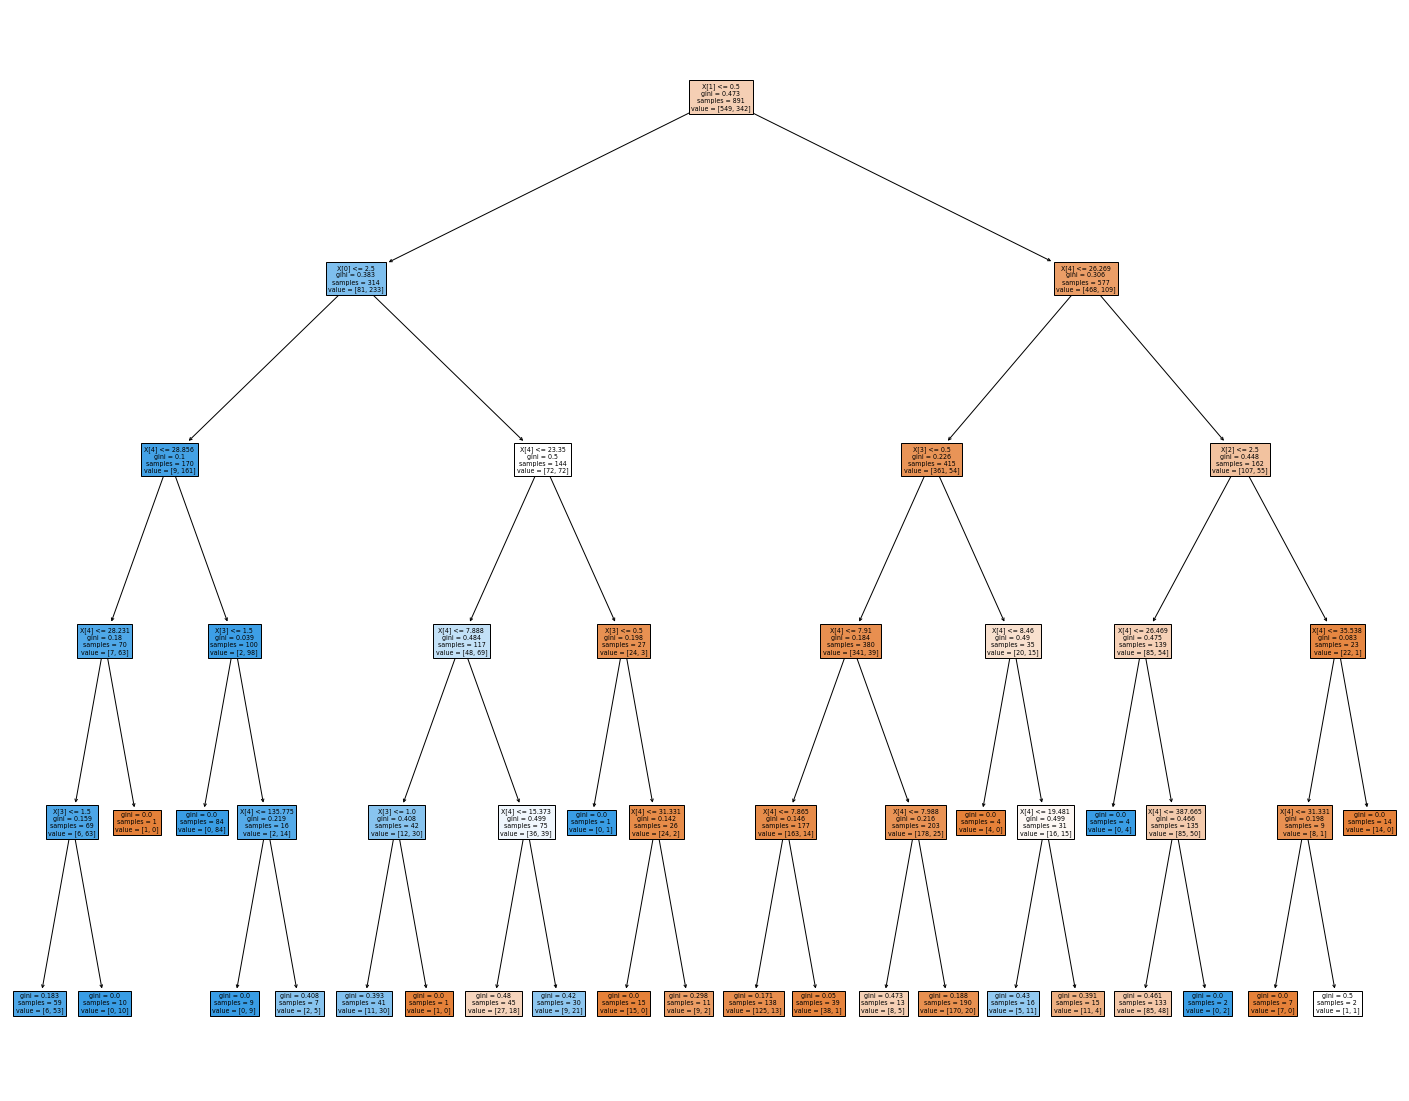

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
plot_tree(model, filled=True)
plt.show()

#### 모형 평가

In [36]:
# 학습 데이터
model.score(X_train, y_train)

0.8372615039281706

In [37]:
# 모형 검증: 평가 데이터
# 학습 데이터와 동일한 처리를 해야 함
test = pd.read_csv('titanic_test.csv', encoding='cp949')
y_test = test.생존여부
X_test = test[['객실등급', '성별', '동반_형제자매배우자', '동반_부모자식', '티켓가격']]
X_test.성별 = X_test.성별.map({'여자':0, '남자':1})

model.score(X_test, y_test)

0.8319327731092437

<font color='tomato'><font color="#CC3D3D"><p>
# End